<a href="https://colab.research.google.com/github/Ozyura1/Laprak-Semester4/blob/main/Modul12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

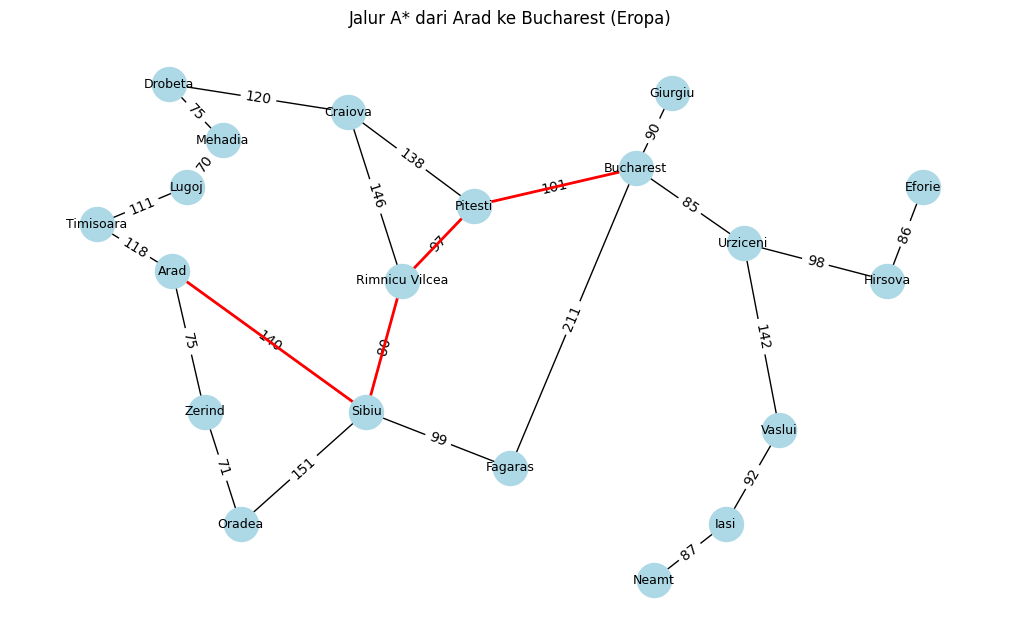

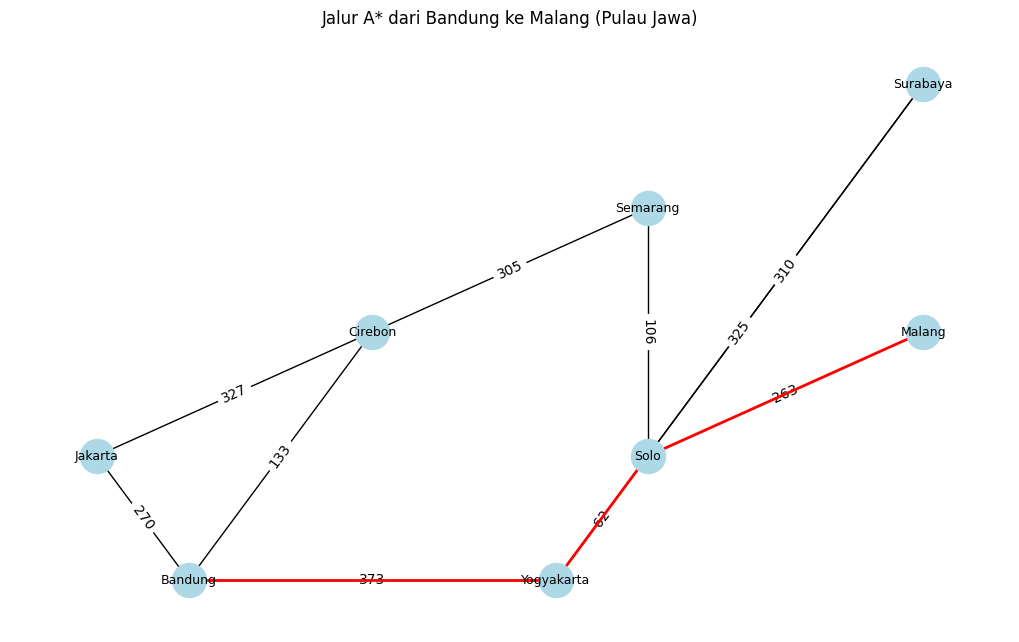

In [1]:
  import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt

# Fungsi menghitung Euclidean Distance
def euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# ===================== GRAF EROPA =====================

# Koordinat kota (untuk heuristik dan plot)
europe_pos = {
    'Arad': (91, 285), 'Zerind': (100, 210), 'Oradea': (110, 150), 'Timisoara': (70, 310),
    'Lugoj': (95, 330), 'Mehadia': (105, 355), 'Drobeta': (90, 385), 'Craiova': (140, 370),
    'Sibiu': (145, 210), 'Rimnicu Vilcea': (155, 280), 'Fagaras': (185, 180), 'Pitesti': (175, 320),
    'Bucharest': (220, 340), 'Giurgiu': (230, 380), 'Urziceni': (250, 300), 'Hirsova': (290, 280),
    'Eforie': (300, 330), 'Vaslui': (260, 200), 'Iasi': (245, 150), 'Neamt': (225, 120)
}

# Edges dan weight
europe_edges = [
    ('Arad', 'Zerind', 75), ('Arad', 'Sibiu', 140), ('Arad', 'Timisoara', 118),
    ('Zerind', 'Oradea', 71), ('Oradea', 'Sibiu', 151),
    ('Timisoara', 'Lugoj', 111), ('Lugoj', 'Mehadia', 70), ('Mehadia', 'Drobeta', 75),
    ('Drobeta', 'Craiova', 120), ('Craiova', 'Pitesti', 138), ('Craiova', 'Rimnicu Vilcea', 146),
    ('Sibiu', 'Rimnicu Vilcea', 80), ('Sibiu', 'Fagaras', 99), ('Fagaras', 'Bucharest', 211),
    ('Rimnicu Vilcea', 'Pitesti', 97), ('Pitesti', 'Bucharest', 101),
    ('Bucharest', 'Giurgiu', 90), ('Bucharest', 'Urziceni', 85), ('Urziceni', 'Hirsova', 98),
    ('Hirsova', 'Eforie', 86), ('Urziceni', 'Vaslui', 142), ('Vaslui', 'Iasi', 92), ('Iasi', 'Neamt', 87)
]

G_europe = nx.Graph()
for u, v, w in europe_edges:
    G_europe.add_edge(u, v, weight=w)

# Heuristic function
heuristic_europe = {city: euclidean(europe_pos[city], europe_pos["Bucharest"]) for city in europe_pos}

# Jalur A*
path_europe = nx.astar_path(G_europe, 'Arad', 'Bucharest', heuristic=lambda a, b: heuristic_europe[a])

# ===================== GRAF PULAU JAWA =====================

# Koordinat kota
java_pos = {
    'Jakarta': (0, 0), 'Cirebon': (3, 1), 'Semarang': (6, 2), 'Surabaya': (9, 3),
    'Bandung': (1, -1), 'Yogyakarta': (5, -1), 'Solo': (6, 0), 'Malang': (9, 1)
}

# Edges dan weight
java_edges = [
    ('Jakarta', 'Cirebon', 327), ('Jakarta', 'Bandung', 270),
    ('Bandung', 'Cirebon', 133), ('Cirebon', 'Semarang', 305),
    ('Semarang', 'Solo', 106), ('Solo', 'Surabaya', 310), ('Solo', 'Malang', 263),
    ('Yogyakarta', 'Solo', 62), ('Yogyakarta', 'Surabaya', 325), ('Bandung', 'Yogyakarta', 373)
]

G_java = nx.Graph()
for u, v, w in java_edges:
    G_java.add_edge(u, v, weight=w)

# Heuristic function
heuristic_java = {city: euclidean(java_pos[city], java_pos["Malang"]) for city in java_pos}

# Jalur A*
path_java = nx.astar_path(G_java, 'Bandung', 'Malang', heuristic=lambda a, b: heuristic_java[a])

# ===================== VISUALISASI =====================

def draw_graph(G, pos, path, title):
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=600, node_color='lightblue', font_size=9)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

    # Garis jalur A*
    edge_path = list(zip(path[:-1], path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edge_path, edge_color='r', width=2)

    plt.title(title)
    plt.axis('off')
    plt.show()

draw_graph(G_europe, europe_pos, path_europe, "Jalur A* dari Arad ke Bucharest (Eropa)")
draw_graph(G_java, java_pos, path_java, "Jalur A* dari Bandung ke Malang (Pulau Jawa)")
